In [1]:
import pandas as pd
import numpy as np

# Load the data into a DataFrame
df = pd.read_json('repository_languages.json')

# Normalize the 'languages' column
df_languages = pd.json_normalize(df['languages'])

# Normalize the 'default_code_scanning' column
df_default_code_scanning = pd.json_normalize(df['default_code_scanning'])

In [2]:
df.head()

,repository_name,languages,default_code_scanning
0,Chainguard-Wolfi-Bites-Back/AOMediaCodec__libavif,"{'C': 1373887, 'C++': 585369, 'CMake': 119784,...","{'state': 'configured', 'languages': ['c-cpp',..."
1,Chainguard-Wolfi-Bites-Back/AcademySoftwareFou...,"{'C++': 1931690, 'C': 1022450, 'CMake': 64713,...","{'state': 'configured', 'languages': ['c-cpp',..."
2,Chainguard-Wolfi-Bites-Back/Aiven-Open__promet...,{'Java': 141677},"{'state': 'configured', 'languages': ['java-ko..."
3,Chainguard-Wolfi-Bites-Back/ArtifexSoftware__j...,"{'C': 627097, 'Python': 12143, 'Shell': 5735, ...","{'state': 'configured', 'languages': ['c-cpp',..."
4,Chainguard-Wolfi-Bites-Back/Azure__azure-cli,"{'Python': 118860860, 'Roff': 1036959, 'Shell'...","{'state': 'configured', 'languages': ['javascr..."


In [3]:
df_languages.head()

,C,C++,CMake,Shell,Java,Batchfile,CoffeeScript,Python,Dockerfile,PowerShell,...,LSL,Mermaid,Haml,Sass,Stylus,Nu,Vim Snippet,KakouneScript,SugarSS,JSONiq
0,1373887.0,585369.0,119784.0,68285.0,21141.0,13176.0,7089.0,912.0,141.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1022450.0,1931690.0,64713.0,7364.0,NaN,NaN,NaN,28638.0,NaN,3917.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,141677.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,627097.0,4531.0,NaN,5735.0,NaN,NaN,NaN,12143.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,58896.0,NaN,14845.0,NaN,118860860.0,11374.0,34760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_default_code_scanning.head()

,state,languages,query_suite,updated_at,schedule
0,configured,"[c-cpp, java-kotlin, python]",default,2024-06-11T12:13:53Z,weekly
1,configured,"[c-cpp, python]",default,2024-06-11T12:14:37Z,weekly
2,configured,[java-kotlin],default,2024-06-11T12:13:01Z,weekly
3,configured,"[c-cpp, python]",default,2024-06-11T12:13:04Z,weekly
4,configured,"[javascript, javascript-typescript, python, ty...",default,2024-06-11T12:13:11Z,weekly


In [5]:
df_default_code_scanning.languages.values

array([list(['c-cpp', 'java-kotlin', 'python']),
       list(['c-cpp', 'python']), list(['java-kotlin']), ...,
       list(['javascript', 'javascript-typescript', 'python', 'typescript']),
       list(['python']), list(['c-cpp', 'python'])], dtype=object)

In [6]:
df_default_code_scanning_languages = df_default_code_scanning.explode('languages')

In [7]:
df_default_code_scanning_languages.languages.value_counts()

languages
python                   698
go                       423
c-cpp                    240
javascript               235
javascript-typescript    235
typescript               235
ruby                     170
java-kotlin               97
swift                     11
csharp                     9
Name: count, dtype: int64

In [8]:
df_languages.count()

C                440
C++              254
CMake            187
Shell            933
Java             109
                ... 
Nu                 1
Vim Snippet        1
KakouneScript      1
SugarSS            1
JSONiq             1
Length: 297, dtype: int64

In [9]:
# Normalize the column names in the 'df_languages' DataFrame to match the column names in the 'df_default_code_scanning_languages' DataFrame
df_languages_normalized = df_languages.rename(columns=lambda x: x.lower())
def df_language_normalized_merge_and_delete(new_name: str, old_names: list):
    df_languages_normalized[new_name] = df_languages_normalized[old_names].sum(axis=1, min_count=1)
    df_languages_normalized.drop(columns=old_names, inplace=True)

df_language_normalized_merge_and_delete('c-cpp', ['c++', 'c'])
df_language_normalized_merge_and_delete('javascript-typescript', ['javascript', 'typescript'])
df_language_normalized_merge_and_delete('java-kotlin', ['java', 'kotlin'])
df_language_normalized_merge_and_delete('csharp', ['c#'])

In [10]:
df_languages_normalized.count()

cmake                    187
shell                    933
batchfile                168
coffeescript               3
python                   715
                        ... 
jsoniq                     1
c-cpp                    467
javascript-typescript    238
java-kotlin              112
csharp                    40
Length: 294, dtype: int64

In [11]:
df_languages.head()

,C,C++,CMake,Shell,Java,Batchfile,CoffeeScript,Python,Dockerfile,PowerShell,...,LSL,Mermaid,Haml,Sass,Stylus,Nu,Vim Snippet,KakouneScript,SugarSS,JSONiq
0,1373887.0,585369.0,119784.0,68285.0,21141.0,13176.0,7089.0,912.0,141.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1022450.0,1931690.0,64713.0,7364.0,NaN,NaN,NaN,28638.0,NaN,3917.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,141677.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,627097.0,4531.0,NaN,5735.0,NaN,NaN,NaN,12143.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,58896.0,NaN,14845.0,NaN,118860860.0,11374.0,34760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_languages_normalized.head()

,cmake,shell,batchfile,coffeescript,python,dockerfile,powershell,html,makefile,roff,...,stylus,nu,vim snippet,kakounescript,sugarss,jsoniq,c-cpp,javascript-typescript,java-kotlin,csharp
0,119784.0,68285.0,13176.0,7089.0,912.0,141.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1959256.0,NaN,21141.0,NaN
1,64713.0,7364.0,NaN,NaN,28638.0,NaN,3917.0,572.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2954140.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141677.0,NaN
3,NaN,5735.0,NaN,NaN,12143.0,NaN,NaN,NaN,5125.0,2056.0,...,NaN,NaN,NaN,NaN,NaN,NaN,631628.0,NaN,NaN,NaN
4,NaN,58896.0,14845.0,NaN,118860860.0,11374.0,34760.0,8992.0,NaN,1036959.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4936.0,NaN,7424.0


In [13]:
# Show how many repositories have CodeQL enabled for a specific language in the 'df_default_code_scanning_languages' DataFrame vs the languages detected present in the GitHub repository in the 'df_languages_normalized' DataFrame

# Merge the 'df_default_code_scanning_languages' DataFrame with the 'df_languages_normalized' DataFrame
df_repositories_with_scan_enabled = df_default_code_scanning_languages.languages.value_counts().rename_axis('Scanned Languages').reset_index(name='Repositories with CodeQL')
df_repositories_with_scan_enabled

,Scanned Languages,Repositories with CodeQL
0,python,698
1,go,423
2,c-cpp,240
3,javascript,235
4,javascript-typescript,235
5,typescript,235
6,ruby,170
7,java-kotlin,97
8,swift,11
9,csharp,9


In [14]:
df_repositories_with_languages = df_languages_normalized.count().rename_axis('Languages').reset_index(name='Repositories with Language')
df_repositories_with_languages

,Languages,Repositories with Language
0,cmake,187
1,shell,933
2,batchfile,168
3,coffeescript,3
4,python,715
...,...,...
289,jsoniq,1
290,c-cpp,467
291,javascript-typescript,238
292,java-kotlin,112


In [15]:
df_languages_merged = pd.merge(df_repositories_with_scan_enabled, df_repositories_with_languages, how='inner', left_on='Scanned Languages', right_on='Languages').drop(columns='Scanned Languages')[['Languages', 'Repositories with Language', 'Repositories with CodeQL']]
df_languages_merged

,Languages,Repositories with Language,Repositories with CodeQL
0,python,715,698
1,go,429,423
2,c-cpp,467,240
3,javascript-typescript,238,235
4,ruby,190,170
5,java-kotlin,112,97
6,swift,24,11
7,csharp,40,9


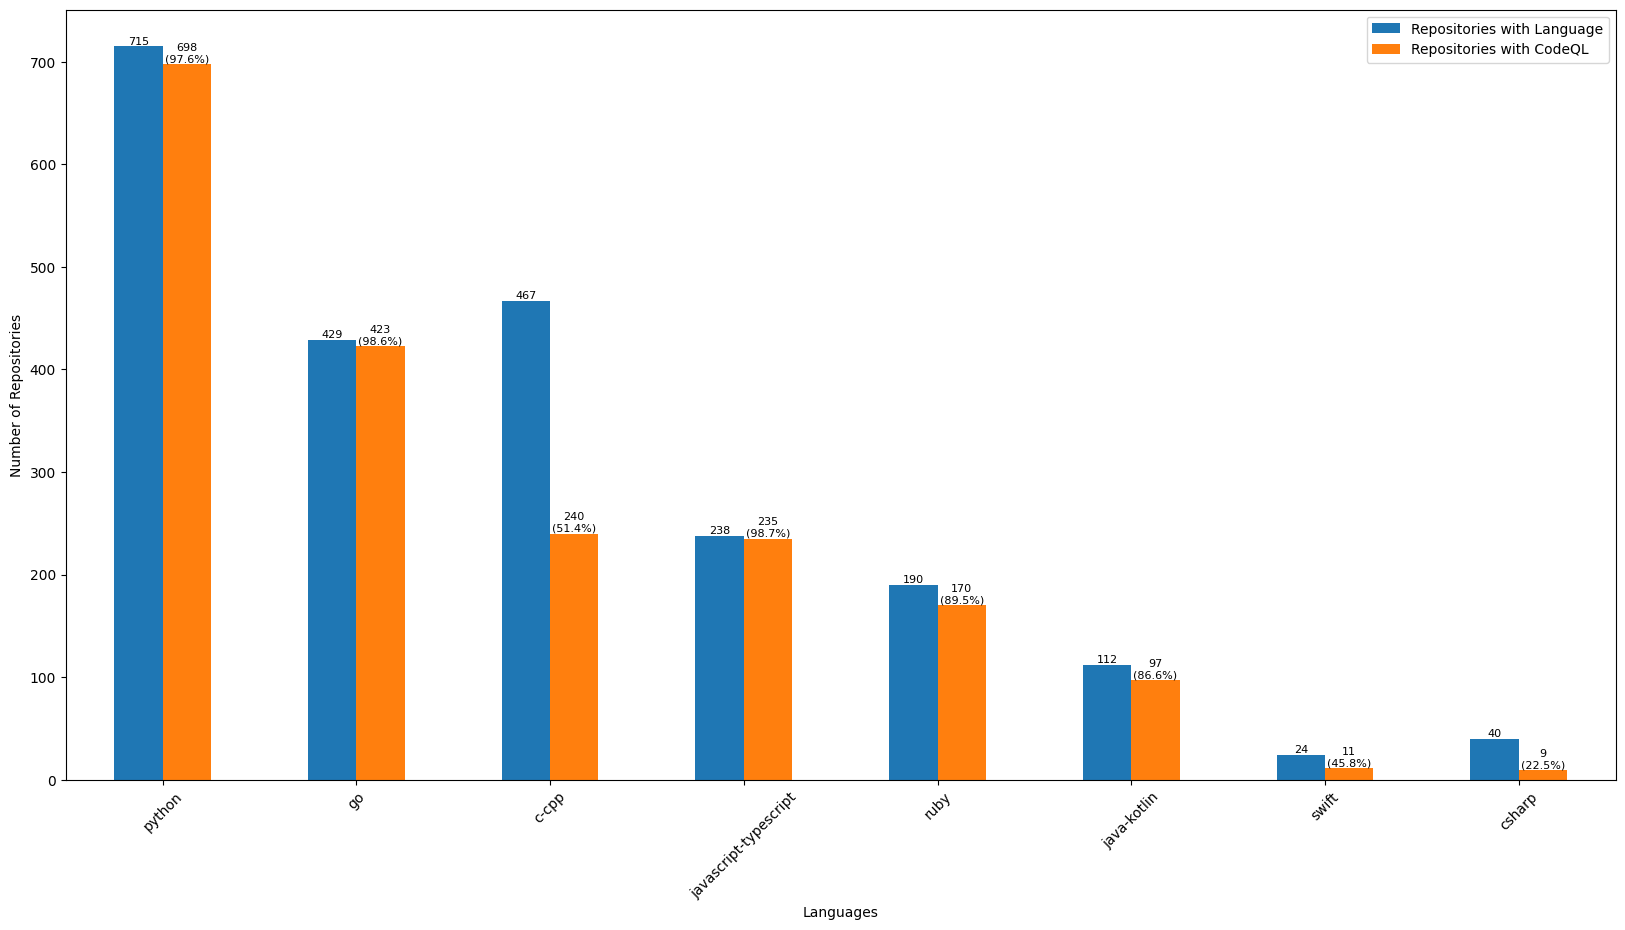

In [16]:
from matplotlib.container import BarContainer
# Show a gouped barplot of the number of repositories with a specific language detected in the GitHub repository and the number of repositories with CodeQL enabled for that language
import matplotlib.pyplot as plt

plot_languages = df_languages_merged.plot(x='Languages', ylabel='Number of Repositories', kind='bar', figsize=(20, 10))
plot_languages.set_xticklabels(df_languages_merged['Languages'], rotation=45)

languages_percentages = df_languages_merged['Repositories with CodeQL'].div(df_languages_merged['Repositories with Language']).mul(100).round(1)
bar_container_languages: BarContainer = plot_languages.containers[0]

# create custom labels with the bar height and the percent from the per column
plot_languages.bar_label(
    bar_container_languages,
    labels=[f'{v.get_height()}' if v.get_height() > 0 else '' for v in bar_container_languages],
    label_type='edge',
    fontsize=8
)

bar_container_codeql_languages: BarContainer = plot_languages.containers[1]

# create custom labels with the bar height and the percent from the per column
plot_languages.bar_label(
    bar_container_codeql_languages,
    labels=[f'{v.get_height()}\n({row}%)' if v.get_height() > 0 else '' for v, row in zip(bar_container_codeql_languages, languages_percentages)],
    label_type='edge', 
    fontsize=8
)    

plt.show()

In [17]:
df_default_code_scanning.languages.value_counts()

languages
[python]                                                                                 375
[go]                                                                                     257
[]                                                                                       106
[c-cpp, python]                                                                           90
[ruby]                                                                                    90
                                                                                        ... 
[csharp, java-kotlin, javascript, javascript-typescript, python, ruby, typescript]         1
[c-cpp, swift]                                                                             1
[csharp, javascript, javascript-typescript, ruby, typescript]                              1
[go, java-kotlin, javascript, javascript-typescript, python, ruby, swift, typescript]      1
[go, javascript, javascript-typescript, python, ruby, swift,

In [18]:
len(df_default_code_scanning)

1368